Import requiered packages

In [2]:
import h5py
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
f = h5py.File('E:/1-DENIS/Biomarkers/SPH dataset/records/A00001.h5', 'r')

In [4]:
signals = f['ecg'][...]

In [5]:
signals.shape

(12, 5000)

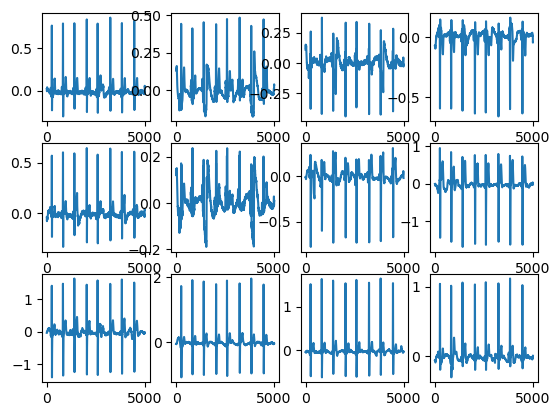

In [6]:
fig = plt.figure()
for pos in range(12):
    axis1 = fig.add_subplot(3,4,pos + 1)
    axis1.plot(signals[pos])

In [7]:
f.close()

In [8]:
normal_ecg_age = pd.read_pickle('normal_ecg_age.pickle')

In [9]:
normal_ecg_age

,ECG_ID,Age,Age_class
0,A00002,32,2
1,A00003,63,5
2,A00006,46,3
3,A00008,32,2
4,A00009,48,3
...,...,...,...
13900,A25755,44,3
13901,A25756,76,6
13902,A25757,55,4
13903,A25764,20,1


In [17]:
from sklearn.decomposition import PCA

In [18]:
pca = PCA(n_components=4).fit(signals.T)

In [19]:
new_pca = pca.transform(signals.T)

In [20]:
new_pca.shape

(5000, 4)

In [21]:
type(new_pca)

numpy.ndarray

In [22]:
new_pca = new_pca.T

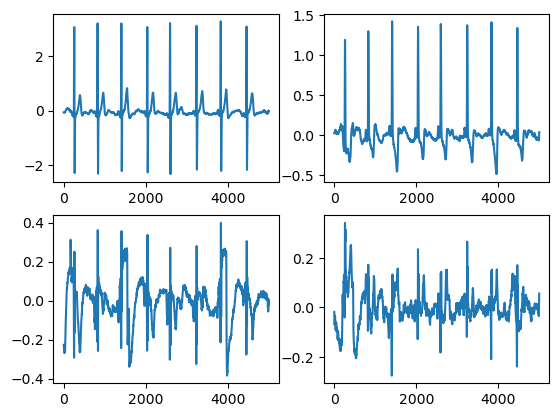

In [23]:
fig = plt.figure()
for fig_pos in range(4):
    axis1 = fig.add_subplot(2, 2, fig_pos + 1)
    axis1.plot(new_pca[fig_pos])

In [24]:
signal_T = signals.T

In [25]:
signal_T.shape

(5000, 12)

In [26]:
signal_df = pd.DataFrame(data=signal_T, columns=['I', 'II', 'III', 'aVR', 'aVL', 'aVF', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6'])

In [27]:
signal_df

,I,II,III,aVR,aVL,aVF,V1,V2,V3,V4,V5,V6
0,0.021606,0.130371,0.108826,-0.075989,-0.043213,0.119995,-0.011200,-0.006401,-0.035187,-0.054413,-0.037598,-0.062408
1,0.021606,0.131958,0.109619,-0.076782,-0.044006,0.120789,-0.012001,-0.010399,-0.033600,-0.054413,-0.036804,-0.062408
2,0.020798,0.131958,0.111206,-0.076782,-0.044800,0.121582,-0.011200,-0.013603,-0.031204,-0.052795,-0.036804,-0.062408
3,0.018402,0.132812,0.113586,-0.075989,-0.047211,0.123230,-0.010399,-0.015198,-0.027206,-0.051208,-0.036804,-0.063171
4,0.016006,0.133545,0.116821,-0.074402,-0.050415,0.125610,-0.008003,-0.016800,-0.022400,-0.048798,-0.035187,-0.064026
...,...,...,...,...,...,...,...,...,...,...,...,...
4995,0.050415,0.020004,-0.030396,-0.035187,0.040009,-0.004799,0.020004,0.023193,-0.022400,-0.024796,-0.029602,-0.010399
4996,0.056000,0.031204,-0.024796,-0.043213,0.040009,0.002399,0.013603,0.017593,-0.021606,-0.022400,-0.024796,-0.004799
4997,0.057587,0.037598,-0.020004,-0.047211,0.038391,0.008797,0.003201,0.005600,-0.027206,-0.024796,-0.021606,0.000000
4998,0.055206,0.038391,-0.016006,-0.047211,0.035187,0.011200,-0.007198,-0.008003,-0.036011,-0.028793,-0.021606,0.000800


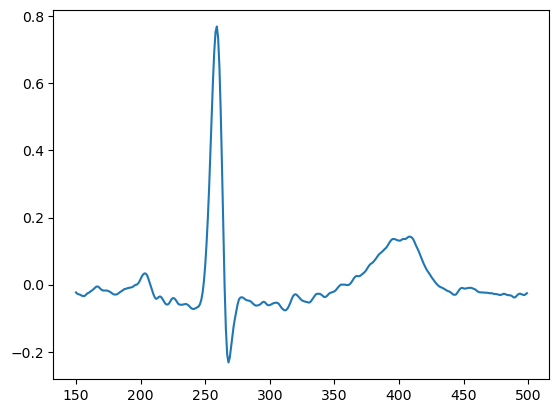

In [28]:
import matplotlib.pyplot as plt
plt.plot(signal_df['I'][150:500])

In [29]:
signal_corr_matrix = signal_df.corr()

In [30]:
signal_corr_matrix

,I,II,III,aVR,aVL,aVF,V1,V2,V3,V4,V5,V6
I,1.000000,0.705279,-0.532402,-0.934377,0.914182,0.179789,0.117774,0.403844,0.797446,0.890900,0.922519,0.920975
II,0.705279,1.000000,0.224583,-0.911560,0.357459,0.824158,-0.160525,0.146682,0.447488,0.582001,0.609839,0.608983
III,-0.532402,0.224583,1.000000,0.195908,-0.829767,0.736952,-0.353898,-0.380224,-0.562045,-0.529752,-0.539938,-0.539037
aVR,-0.934377,-0.911560,0.195908,1.000000,-0.709819,-0.518437,0.012486,-0.307833,-0.687357,-0.809175,-0.841566,-0.840203
aVL,0.914182,0.357459,-0.829767,-0.709819,1.000000,-0.234296,0.246852,0.448145,0.794786,0.840996,0.866791,0.865230
aVF,0.179789,0.824158,0.736952,-0.518437,-0.234296,1.000000,-0.317339,-0.119449,-0.016411,0.095740,0.109180,0.108975
V1,0.117774,-0.160525,-0.353898,0.012486,0.246852,-0.317339,1.000000,0.800119,0.598350,0.407314,0.264063,0.104934
V2,0.403844,0.146682,-0.380224,-0.307833,0.448145,-0.119449,0.800119,1.000000,0.760577,0.607420,0.516211,0.332017
V3,0.797446,0.447488,-0.562045,-0.687357,0.794786,-0.016411,0.598350,0.760577,1.000000,0.939961,0.888255,0.766274
V4,0.890900,0.582001,-0.529752,-0.809175,0.840996,0.095740,0.407314,0.607420,0.939961,1.000000,0.971611,0.888665


In [31]:
signal_corr_matrix['I'].sort_values(ascending=False)

I      1.000000
V5     0.922519
V6     0.920975
aVL    0.914182
V4     0.890900
V3     0.797446
II     0.705279
V2     0.403844
aVF    0.179789
V1     0.117774
III   -0.532402
aVR   -0.934377
Name: I, dtype: float64

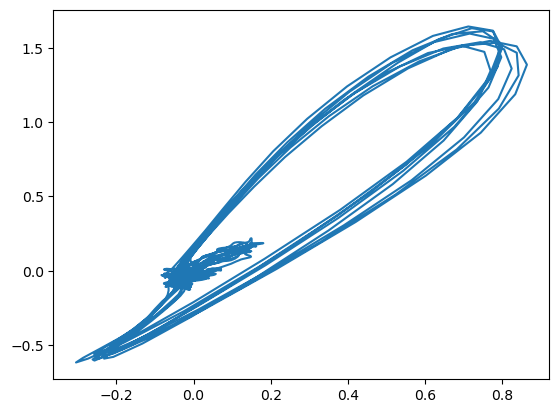

In [32]:
plt.plot(signal_df['I'], signal_df['V5'])

In [33]:
from pandas.plotting import scatter_matrix

In [34]:
attributes = ['I', 'V5', 'V6', 'aVL', 'V4', 'aVR']

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001DB28145DF0>,
      dtype=object)

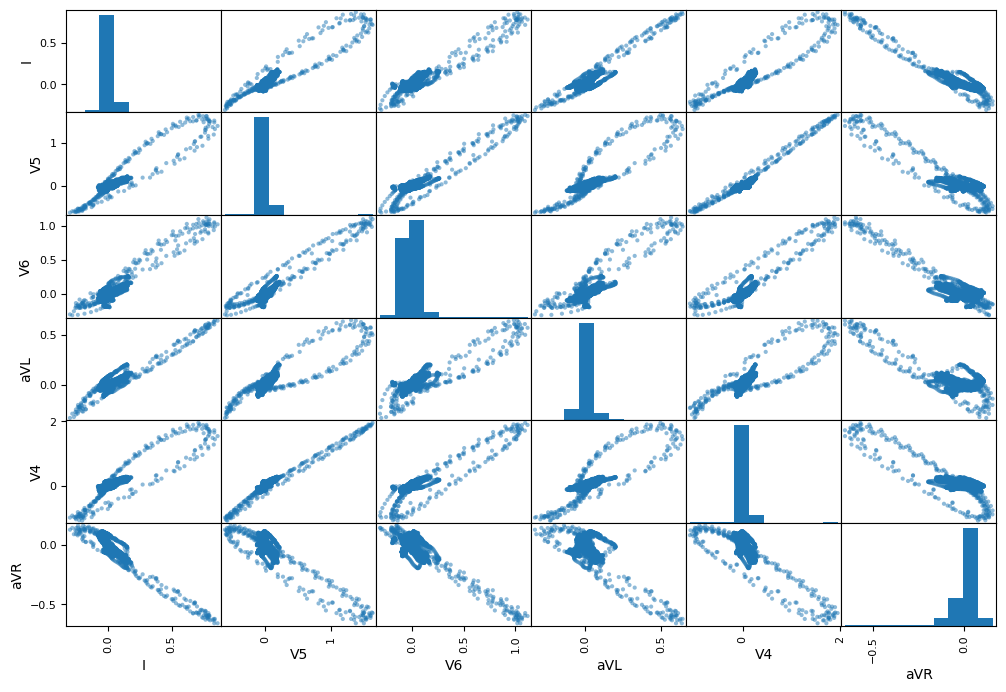

In [35]:
scatter_matrix(signal_df[attributes], figsize=(12, 8))

(array([  29.,   86., 4333.,  442.,   23.,   15.,   11.,   17.,   19.,
          25.]),
 array([-0.3047 , -0.1879 , -0.071  ,  0.04584,  0.1627 ,  0.2795 ,
         0.3965 ,  0.513  ,  0.63   ,  0.747  ,  0.864  ], dtype=float16),
 <a list of 10 Patch objects>)

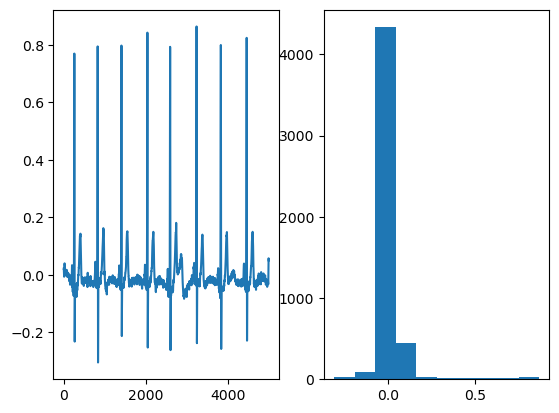

In [36]:
fig = plt.figure()
axi1 = fig.add_subplot(1, 2, 1)
axi2 = fig.add_subplot(1, 2, 2)
axi1.plot(signal_df['I'])
axi2.hist(signal_df['I'])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001DB28145EE0>,
      dtype=object)

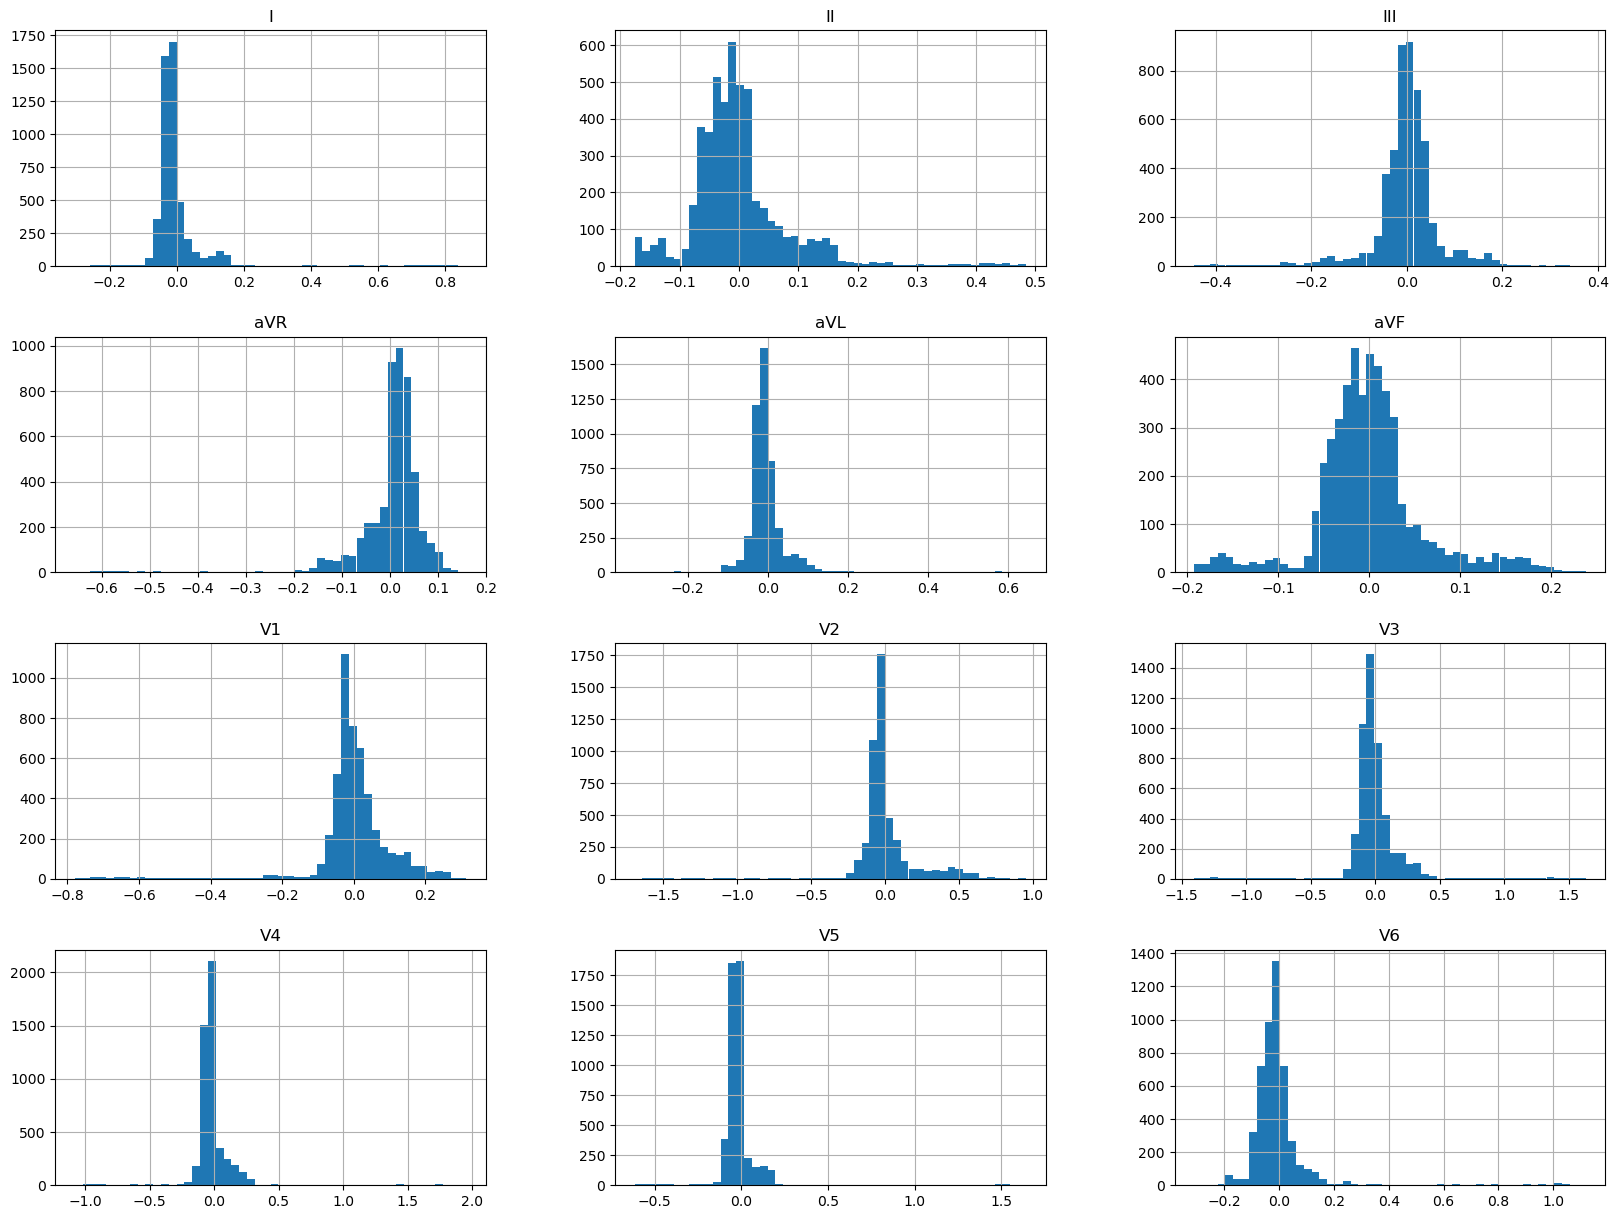

In [37]:
signal_df.hist(bins=50, figsize=(20,15))

probando maximun modulus line

In [38]:
import math

In [39]:
signal_abs = abs(signal_df['I'])

In [1]:
fig = plt.figure()
axi1 = fig.add_subplot(1, 2, 1)
axi2 = fig.add_subplot(1, 2, 2)
axi1.plot(signal_df['I'])
axi2.plot(signal_abs)